Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [11]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [12]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [13]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
#data_dir_train = pathlib.Path(".\Skin cancer ISIC The International Skin Imaging Collaboration\Train")
#ata_dir_test = pathlib.Path(".\Skin cancer ISIC The International Skin Imaging Collaboration\Test")

data_dir_train = pathlib.Path('/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train')
data_dir_test = pathlib.Path('/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [14]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [15]:
batch_size = 32
img_height = 180
img_width = 180
num_channels = 3

image_size = (img_width, img_height)
input_shape = (img_width, img_height, num_channels)

n_epochs = 20

random_seed = 123

Use 80% of the images for training, and 20% for validation.

In [16]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=image_size,
    batch_size=batch_size,
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [17]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_test,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=image_size,
    batch_size=batch_size,
)

Found 118 files belonging to 9 classes.
Using 23 files for validation.


In [18]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.

class_names = train_ds.class_names
num_classes = len(class_names)
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

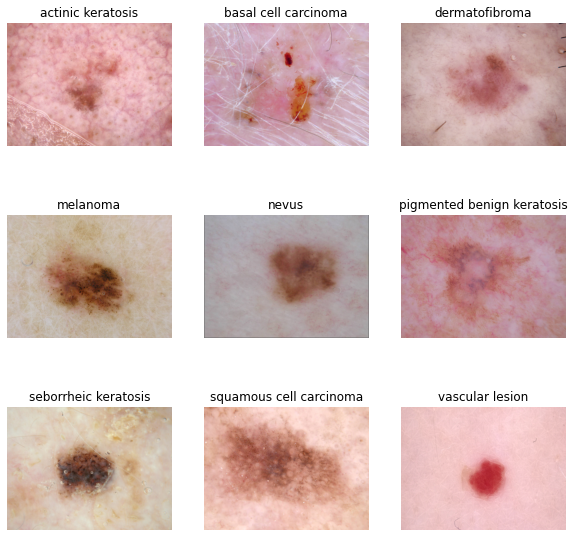

In [19]:
import glob
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(10, 10))

for i, class_name in enumerate(list(class_names)):
    plt.subplot(3, 3, i+1)
    data_path = os.path.join(str(data_dir_train), class_name)
    file_path = glob.glob(os.path.join(data_path,'*.jpg'))[0]
    img = PIL.Image.open(file_path)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis("off")
plt.show()

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [20]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [21]:
!pip install pydot

In [22]:
!pip install graphviz

In [23]:
model = Sequential()

#input
model.add(tf.keras.Input(shape=input_shape))

#set rescaling to normalize rgb saturation values from [0,255] to [0,1]
model.add(layers.Rescaling(1.0 / 255))

#layer1: 32 convolution filters of size (3x3), 'ReLU' Activation and padding. MaxPooling.
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

#layer2: 64 convolution filters of size (3x3), 'ReLU' Activation and padding. MaxPooling.
model.add(layers.Conv2D(64, (3, 3), activation = 'relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

#layer3: 32 convolution filters of size (3x3), 'ReLU' Activation and padding. MaxPooling with L1 regularization
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', padding='same', kernel_regularizer='l1'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

#flatten feature map to a vector 
model.add(layers.Flatten())

#FCN classifier
model.add(layers.Dense(128, activation='relu'))

#output
model.add(layers.Dense(num_classes, activation='softmax'))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [24]:
### Todo, choose an appropirate optimiser and loss function

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=opt,#'Adam' optimiser
              loss='sparse_categorical_crossentropy',#multiclass, numeric labels
              metrics=['accuracy'])

In [25]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 32)        1

### Train the model

In [26]:
epochs = n_epochs
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 201s 149ms/step - loss: 9.2039 - accuracy: 0.2288 - val_loss: 9.0116 - val_accuracy: 0.2174
Epoch 2/20
56/56 [==============================] - 3s 58ms/step - loss: 8.2360 - accuracy: 0.2919 - val_loss: 8.3331 - val_accuracy: 0.0870
Epoch 3/20
56/56 [==============================] - 3s 57ms/step - loss: 7.3722 - accuracy: 0.3583 - val_loss: 7.5109 - val_accuracy: 0.3043
Epoch 4/20
56/56 [==============================] - 3s 57ms/step - loss: 6.6054 - accuracy: 0.4029 - val_loss: 6.9718 - val_accuracy: 0.1739
Epoch 5/20
56/56 [==============================] - 3s 57ms/step - loss: 5.9367 - accuracy: 0.4319 - val_loss: 6.3049 - val_accuracy: 0.2609
Epoch 6/20
56/56 [==============================] - 3s 56ms/step - loss: 5.3595 - accuracy: 0.4448 - val_loss: 5.9474 - val_accuracy: 0.2609
Epoch 7/20
56/56 [==============================] - 3s 57ms/step - loss: 4.8727 - accuracy: 0.4621 - val_loss: 5.4244 - val_accuracy: 0.2609
Epoch 8/20

### Visualizing training results

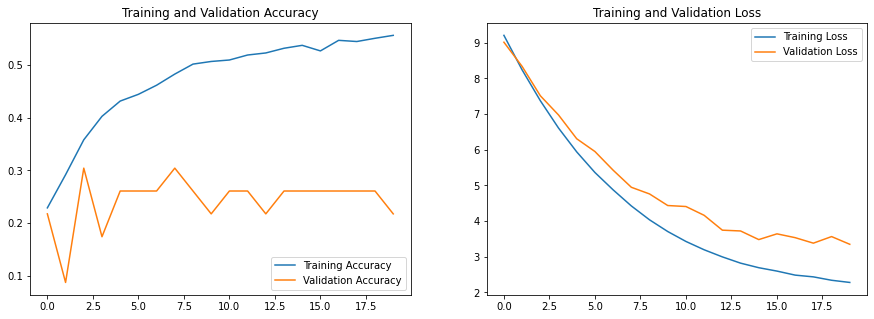

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here
### Findings:
#### The validation accuracy saturates after 4 epochs and keeps fluctuating
#### This is possibly because of overfitting on the training data


In [28]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_augmentation = tf.keras.Sequential(
  [
    layers.RandomFlip("horizontal", input_shape=input_shape),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

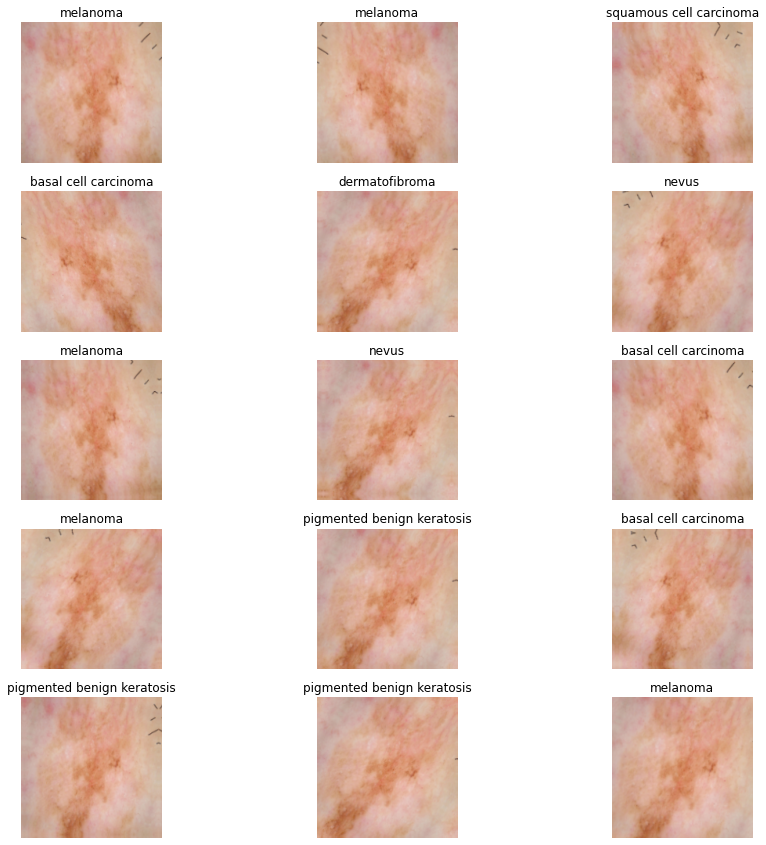

In [29]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10, 10))
for images, label in train_ds.take(1):
    for i in range(15):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(5, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.title(label[i])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [30]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

#model = Sequential()

#input
#model.add(tf.keras.Input(shape=input_shape))

#same architecture. but this time model is built with input data augmentation
model = data_augmentation

#set rescaling to normalize rgb saturation values from [0,255] to [0,1]
model.add(layers.Rescaling(1.0 / 255))

#layer1: 32 convolution filters of size (3x3), 'ReLU' Activation and padding. MaxPooling.
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

#layer2: 64 convolution filters of size (3x3), 'ReLU' Activation and padding. MaxPooling.
model.add(layers.Conv2D(64, (3, 3), activation = 'relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

#layer3: 32 convolution filters of size (3x3), 'ReLU' Activation and padding. MaxPooling with L1 regularization
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', padding='same', kernel_regularizer='l1'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

#dropout
model.add(layers.Dropout(0.1))

#flatten feature map to a vector 
model.add(layers.Flatten())

#FCN classifier
model.add(layers.Dense(128, activation='relu'))

#output
model.add(layers.Dense(num_classes, activation='softmax'))

### Compiling the model

In [31]:
## Your code goes here
### Todo, choose an appropirate optimiser and loss function

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=opt,#'Adam' optimiser
              loss='sparse_categorical_crossentropy',#multiclass, numeric labels
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 180, 180, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 180, 180, 3)      0         
 tion)                                                           
                                                                 
 random_zoom (RandomZoom)    (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                  

### Training the model

In [32]:
## Your code goes here, note: train your model for 20 epochs
epochs = n_epochs
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 5s 66ms/step - loss: 9.1661 - accuracy: 0.2271 - val_loss: 9.0727 - val_accuracy: 0.0870
Epoch 2/20
56/56 [==============================] - 4s 63ms/step - loss: 8.1748 - accuracy: 0.3398 - val_loss: 8.2854 - val_accuracy: 0.1739
Epoch 3/20
56/56 [==============================] - 4s 63ms/step - loss: 7.3372 - accuracy: 0.4018 - val_loss: 7.5538 - val_accuracy: 0.2609
Epoch 4/20
56/56 [==============================] - 3s 62ms/step - loss: 6.6194 - accuracy: 0.4291 - val_loss: 6.8783 - val_accuracy: 0.2609
Epoch 5/20
56/56 [==============================] - 3s 62ms/step - loss: 6.0272 - accuracy: 0.4269 - val_loss: 6.3818 - val_accuracy: 0.2609
Epoch 6/20
56/56 [==============================] - 4s 63ms/step - loss: 5.4989 - accuracy: 0.4425 - val_loss: 6.3688 - val_accuracy: 0.1739
Epoch 7/20
56/56 [==============================] - 4s 63ms/step - loss: 5.0420 - accuracy: 0.4408 - val_loss: 5.5477 - val_accuracy: 0.2609
Epoch 8/20
56

### Visualizing the results

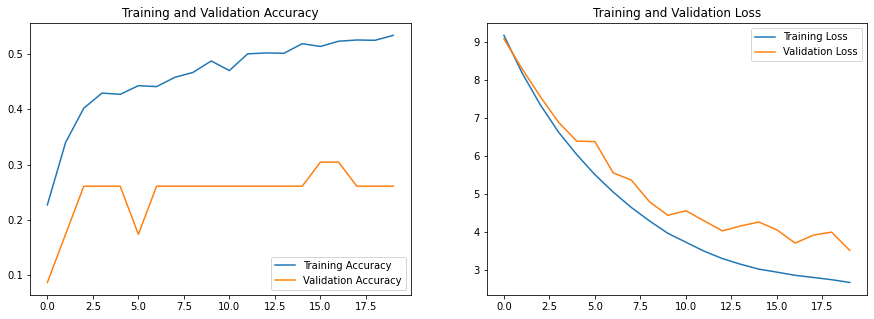

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### Though there is a marginal increase in the validation accuracy, but still fluctuates after 4 epochs. Overfiting still seems to be.
#### Overal the model seems to be more stable.
#### We can check for class imbalances and if we can selectively augment further

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

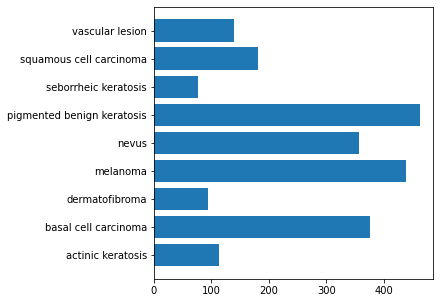

In [34]:
## Your code goes here.
frequency = {}

for name in class_names:
    frequency[name] = len(list(data_dir_train.glob(name+'/*.jpg')))

plt.figure(figsize=(5,5))
plt.barh(range(len(frequency)), list(frequency.values()), align='center')
plt.yticks(range(len(frequency)), list(frequency.keys()))
plt.show()

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?.
*   seborrheic keratosis

#### - Which classes dominate the data in terms proportionate number of samples?
* pigmented benign keratosis
* nevus
* meianoma
* basal cell carcinoma




#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [35]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [36]:
path_to_training_dataset = str(data_dir_train)
path_to_training_dataset

'/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train'

In [37]:
import Augmentor
for class_name in class_names:
    class_path =  path_to_training_dataset + '/' + class_name
    p = Augmentor.Pipeline(class_path)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F390E937AD0>: 100%|██████████| 500/500 [00:22<00:00, 21.89 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F390E93EFD0>: 100%|██████████| 500/500 [00:22<00:00, 22.54 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F390E607D90>: 100%|██████████| 500/500 [00:22<00:00, 22.06 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=2048x1536 at 0x7F390E607150>: 100%|██████████| 500/500 [01:48<00:00,  4.60 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F390E648E50>: 100%|██████████| 500/500 [01:36<00:00,  5.20 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F390E618F50>: 100%|██████████| 500/500 [00:21<00:00, 23.05 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F398999DF10>: 100%|██████████| 500/500 [00:50<00:00,  9.81 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F3987F31510>: 100%|██████████| 500/500 [00:22<00:00, 22.58 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F390EBC15D0>: 100%|██████████| 500/500 [00:22<00:00, 22.36 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [38]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [39]:
data_dir_train

path_list_new = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
len(path_list_new)

4500

In [40]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
len(lesion_list_new)

4500

In [41]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [42]:
#df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
#new_df = original_df.append(df2)

In [43]:
#new_df['Label'].value_counts()

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [44]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [46]:
data_dir_train="/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [47]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [48]:
## your code goes here
#using the same architecture as before which was built with input data augmentation earlier.
#the architecture can be tweaked later if required.
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 180, 180, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 180, 180, 3)      0         
 tion)                                                           
                                                                 
 random_zoom (RandomZoom)    (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                  

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [50]:
## your code goes here
## we are reusing the model defined earlier.


In [51]:
## Your code goes here
### Todo, choose an appropirate optimiser and loss function

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=opt,#'Adam' optimiser, with LR = 0.0001
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),#multiclass, numeric labels
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 180, 180, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 180, 180, 3)      0         
 tion)                                                           
                                                                 
 random_zoom (RandomZoom)    (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                  

#### **Todo:**  Train your model

In [52]:
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


169/169 [==============================] - 43s 239ms/step - loss: 2.7214 - accuracy: 0.4501 - val_loss: 2.6153 - val_accuracy: 0.4558
Epoch 2/50
169/169 [==============================] - 40s 232ms/step - loss: 2.5675 - accuracy: 0.4668 - val_loss: 2.4989 - val_accuracy: 0.4618
Epoch 3/50
169/169 [==============================] - 41s 233ms/step - loss: 2.4382 - accuracy: 0.4839 - val_loss: 2.3826 - val_accuracy: 0.4766
Epoch 4/50
169/169 [==============================] - 40s 231ms/step - loss: 2.3267 - accuracy: 0.4850 - val_loss: 2.2681 - val_accuracy: 0.4929
Epoch 5/50
169/169 [==============================] - 40s 231ms/step - loss: 2.2439 - accuracy: 0.4833 - val_loss: 2.1753 - val_accuracy: 0.5093
Epoch 6/50
169/169 [==============================] - 40s 229ms/step - loss: 2.1608 - accuracy: 0.5004 - val_loss: 2.1019 - val_accuracy: 0.5078
Epoch 7/50
169/169 [==============================] - 40s 229ms/step - loss: 2.0863 - accuracy: 0.5022 - val_loss: 2.0481 - val_accuracy: 0.5

#### **Todo:**  Visualize the model results

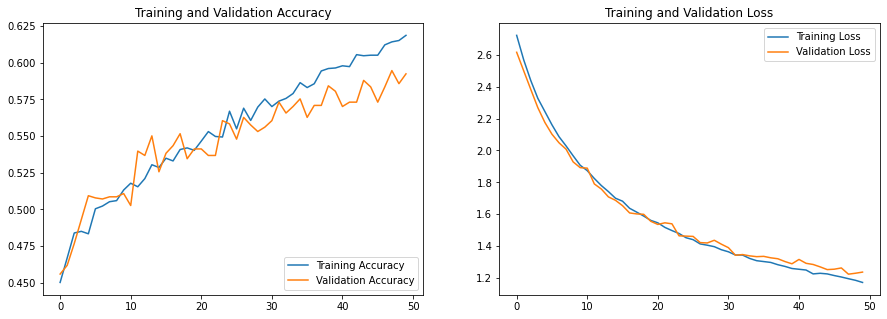

In [53]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



In [54]:
### Analysis after Class Rebalancing using Augmentor.

#### We find that the model training and validation accuracy and loss are pretty close
#### We are able to get rid of overfiting well as the validation doesn't fail as before.
#### We are able to increase the accuracy to ~60+%.
#### We find that the model is more stabler than before.
#### There is room for further optimization here.